In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


This is the stock prediction part which happens after running the NLP file first. But in this case I had all the data saved hence, you can run this file directly to see the results.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout
from keras.layers import LSTM
from scipy.io import savemat
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D, GlobalMaxPooling1D

Using TensorFlow backend.


             Open         High  ...     Volume    Adj Close
0     11432.08984  11759.95996  ...  212830000  11734.32031
1     11729.66992  11867.11035  ...  183190000  11782.34961
2      11781.7002  11782.34961  ...  173590000  11642.46973
3     11632.80957  11633.78027  ...  182550000  11532.95996
4     11532.07031  11718.28027  ...  159790000  11615.92969
5     11611.20996  11709.88965  ...  215040000  11659.90039
6     11659.65039  11690.42969  ...  156290000  11479.38965
7     11478.08984  11478.16992  ...  171580000  11348.54981
8     11345.94043  11454.15039  ...  144880000  11417.42969
9     11415.23047  11476.20996  ...  130020000  11430.20996
10    11426.79004  11632.12988  ...  138790000  11628.05957
11    11626.19043  11626.26953  ...  148610000  11386.25000
12    11383.55957  11436.24023  ...  119800000  11412.87012
13    11412.45996  11554.45996  ...  120580000  11502.50977
14    11499.87012  11715.17969  ...  149150000  11715.17969
15    11713.23047  11713.23047  ...  166

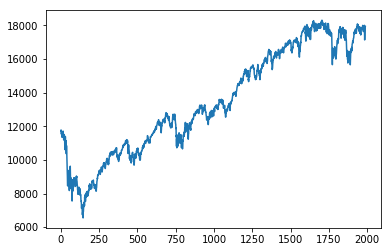

In [3]:
"""
This deals with Importing the nlp prediction values and importing
 the stock data. THen the data is seperates to data and target by 
 stripping the stock values of of its ADJ close values to create 
 target values. Then the NLP data is merged with the Open, Close, 
 High, Low, Volume data to prepare the train/test data. 
"""

class data_manager:
  """
  This segment here imports the data. 
  It is designed to either import data using 
  pandas or numpy depending on the typr of file.

  


  """
  
  
  def fetch_data(self,path_to_data='',numpy=False):
    """
    This function fetches the data using pandas or numpy depending on the Value set
    and returns a data. It takes an additional string which is the location of the file to import the data.
    
    path_to_data : String 
    the directory of the file that needs to be fetched.

    numpy : Boolean
    When true it loads numpy data. Default is False to load the csv data using pandas.
    """
    if numpy:
      return np.load(path_to_data)
    else:
      return pd.read_csv(path_to_data,low_memory=False,parse_dates=[0])
  def saver(self,file_to_save,path_to_save=''):
    np.save(path_to_save,file_to_save)
importer=data_manager()
nlp_values=importer.fetch_data('drive/My Drive/Summer 2020/Finance/data/stocknews/out.npy',numpy=True)
data_whole=importer.fetch_data('drive/My Drive/Summer 2020/Finance/data/stocknews/upload_DJIA_table.csv')
print(data_whole)
target_col = data_whole.columns[-1]
y = data_whole[target_col].values
data_whole=data_whole.drop(['Adj Close'], axis=1)
data_whole['nlp']=nlp_values

print(data_whole)

feature_cols = list(data_whole.columns)

X = data_whole[feature_cols].values
#y = data_whole[target_col].values
#data=data_whole['ADBE']
#data.dropna(inplace=True)
plt.plot(y)
plt.show()


In [4]:
"""
This scales the data and splits it into test and train data with a split of 40/60 respectively.
"""

np.random.seed(7)
scaler_x = MinMaxScaler(feature_range=(0,3))
X = scaler_x.fit_transform(X)
X = pd.DataFrame(X)
scaler_y=MinMaxScaler()
y=scaler_y.fit_transform(y.reshape(y.shape[0],1))
y=pd.DataFrame(y)
train_size = int(len(X) * 0.6)
test_size = len(X) - train_size
trainX, testX = X.values[0:train_size,:], X.values[train_size:len(X),:]
trainY, testY = y.values[0:train_size], y.values[train_size:len(X)]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(len(trainX), len(testX))

(1193, 796)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
'''
THis is the LSTM model with 20 modes and dense layer for prediction.
'''
def create_model(units,shape):
  model = Sequential()
  model.add(LSTM(units, input_shape=shape,return_sequences = False))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model 
model=create_model(20,(1, 6))
model.fit(trainX, trainY,validation_split=0.1, epochs=100, batch_size=10, verbose=2)

Train on 1073 samples, validate on 120 samples
Epoch 1/100
 - 1s - loss: 0.0130 - val_loss: 0.0033
Epoch 2/100
 - 0s - loss: 6.6451e-04 - val_loss: 0.0022
Epoch 3/100
 - 0s - loss: 3.1017e-04 - val_loss: 0.0012
Epoch 4/100
 - 0s - loss: 1.8241e-04 - val_loss: 7.0049e-04
Epoch 5/100
 - 0s - loss: 1.1615e-04 - val_loss: 4.8027e-04
Epoch 6/100
 - 0s - loss: 7.9657e-05 - val_loss: 4.1620e-04
Epoch 7/100
 - 0s - loss: 5.9324e-05 - val_loss: 3.1843e-04
Epoch 8/100
 - 0s - loss: 4.7712e-05 - val_loss: 2.8105e-04
Epoch 9/100
 - 0s - loss: 4.1881e-05 - val_loss: 2.2537e-04
Epoch 10/100
 - 0s - loss: 3.7531e-05 - val_loss: 2.1318e-04
Epoch 11/100
 - 0s - loss: 3.5659e-05 - val_loss: 1.9226e-04
Epoch 12/100
 - 0s - loss: 3.4700e-05 - val_loss: 2.0444e-04
Epoch 13/100
 - 0s - loss: 3.3768e-05 - val_loss: 2.4621e-04
Epoch 14/100
 - 0s - loss: 3.1713e-05 - val_loss: 2.1976e-04
Epoch 15/100
 - 0s - loss: 3.2688e-05 - val_loss: 1.4700e-04
Epoch 16/100
 - 0s - loss: 3.0445e-05 - val_loss: 1.5635e-04
Ep

In [0]:
"""
THis is a new evaluation metric which is mean average 
percent error which calculates percent error for each 
predictions and gives the avg of these.
"""
def mape(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()*100

In [8]:
"""
This is the evaluation part where the data is used to predict based 
on the mode and the errors are calculated for test and train data.
"""
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler_y.inverse_transform(trainPredict)
trainY = scaler_y.inverse_transform(trainY)
testPredict = scaler_y.inverse_transform(testPredict)
testY = scaler_y.inverse_transform(testY)
lst={}
lst['trainPredict']=trainPredict
lst['testPredict']=testPredict
lst['trainY']=trainY
lst['testY']=testY
savemat('lstm.mat',lst)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 18.96 RMSE
Test Score: 267.51 RMSE


In [9]:
print (testY.shape,testPredict.shape)
mape(testY, testPredict)

((796, 1), (796, 1))


1.3717837591002782

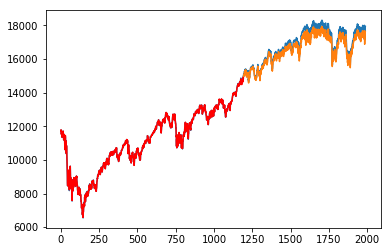

In [10]:
"""
Rearrange data for better representation for plotting.
"""
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:] = np.nan
trainPredictPlot[:len(trainPredict)] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict):len(y)]= testPredict
# plot baseline and predictions
plt.plot(scaler_y.inverse_transform(y))
plt.plot(trainPredict,'r')
plt.plot(testPredictPlot)
plt.show()


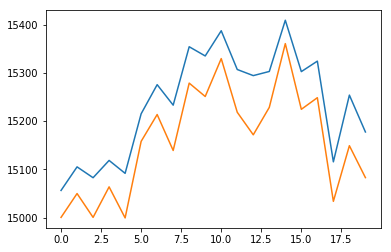

In [11]:
"""
Smaller cut to observe the actual trends and the verify if the precitions follows the trend or not.
"""


trainPredictPlot = np.empty_like(y)
trainPredictPlot[:] = np.nan
trainPredictPlot[:len(trainPredict)] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict):len(y)]= testPredict
# plot baseline and predictions
plt.plot(scaler_y.inverse_transform(y)[len(trainPredict):len(trainPredict)+20])
#plt.plot(trainPredict,'r')
plt.plot(testPredictPlot[len(trainPredict):len(trainPredict)+20])
plt.show()


             Open         High  ...     Volume    Adj Close
0     11432.08984  11759.95996  ...  212830000  11734.32031
1     11729.66992  11867.11035  ...  183190000  11782.34961
2      11781.7002  11782.34961  ...  173590000  11642.46973
3     11632.80957  11633.78027  ...  182550000  11532.95996
4     11532.07031  11718.28027  ...  159790000  11615.92969
5     11611.20996  11709.88965  ...  215040000  11659.90039
6     11659.65039  11690.42969  ...  156290000  11479.38965
7     11478.08984  11478.16992  ...  171580000  11348.54981
8     11345.94043  11454.15039  ...  144880000  11417.42969
9     11415.23047  11476.20996  ...  130020000  11430.20996
10    11426.79004  11632.12988  ...  138790000  11628.05957
11    11626.19043  11626.26953  ...  148610000  11386.25000
12    11383.55957  11436.24023  ...  119800000  11412.87012
13    11412.45996  11554.45996  ...  120580000  11502.50977
14    11499.87012  11715.17969  ...  149150000  11715.17969
15    11713.23047  11713.23047  ...  166

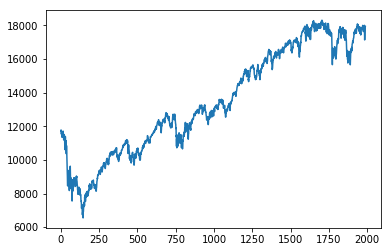

(1193, 796)


In [12]:
'''
Same steps for without using the NLP predictions.
'''

data_whole=importer.fetch_data('drive/My Drive/Summer 2020/Finance/data/stocknews/upload_DJIA_table.csv')
#nlp_values=np.load('drive/My Drive/downloads/stocknews/out.npy')
print(data_whole)
target_col = data_whole.columns[-1]
y = data_whole[target_col].values
data_whole=data_whole.drop(['Adj Close'], axis=1)

#data_whole['nlp']=nlp_values
print(data_whole)

feature_cols = list(data_whole.columns)

X = data_whole[feature_cols].values
print(X.shape)
#y = data_whole[target_col].values
#data=data_whole['ADBE']
#data.dropna(inplace=True)
plt.plot(y)
plt.show()
np.random.seed(7)
scaler_x = MinMaxScaler(feature_range=(0,3))
X = scaler_x.fit_transform(X)
X = pd.DataFrame(X)
scaler_y=MinMaxScaler()
y=scaler_y.fit_transform(y.reshape(y.shape[0],1))
y=pd.DataFrame(y)
train_size = int(len(X) * 0.6)
test_size = len(X) - train_size
trainX, testX = X.values[0:train_size,:], X.values[train_size:len(X),:]
trainY, testY = y.values[0:train_size], y.values[train_size:len(X)]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(len(trainX), len(testX))

In [13]:
model1=create_model(20,(1,5))
model1.fit(trainX, trainY,validation_split=0.1, epochs=100, batch_size=10, verbose=2)

Train on 1073 samples, validate on 120 samples
Epoch 1/100
 - 0s - loss: 0.0175 - val_loss: 0.0047
Epoch 2/100
 - 0s - loss: 3.6553e-04 - val_loss: 0.0020
Epoch 3/100
 - 0s - loss: 1.8702e-04 - val_loss: 0.0014
Epoch 4/100
 - 0s - loss: 1.4052e-04 - val_loss: 9.2158e-04
Epoch 5/100
 - 0s - loss: 1.1162e-04 - val_loss: 7.7333e-04
Epoch 6/100
 - 0s - loss: 9.3414e-05 - val_loss: 5.0820e-04
Epoch 7/100
 - 0s - loss: 8.2432e-05 - val_loss: 4.3207e-04
Epoch 8/100
 - 0s - loss: 7.6871e-05 - val_loss: 3.1028e-04
Epoch 9/100
 - 0s - loss: 7.3164e-05 - val_loss: 3.5503e-04
Epoch 10/100
 - 0s - loss: 6.9358e-05 - val_loss: 3.1028e-04
Epoch 11/100
 - 0s - loss: 6.8064e-05 - val_loss: 2.1891e-04
Epoch 12/100
 - 0s - loss: 7.0163e-05 - val_loss: 2.7828e-04
Epoch 13/100
 - 0s - loss: 6.4511e-05 - val_loss: 2.2661e-04
Epoch 14/100
 - 0s - loss: 6.1121e-05 - val_loss: 2.6987e-04
Epoch 15/100
 - 0s - loss: 6.1525e-05 - val_loss: 1.8765e-04
Epoch 16/100
 - 0s - loss: 6.0112e-05 - val_loss: 2.0125e-04
Ep

In [0]:
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)
trainPredict = scaler_y.inverse_transform(trainPredict)
trainY = scaler_y.inverse_transform(trainY)
testPredict = scaler_y.inverse_transform(testPredict)
testY = scaler_y.inverse_transform(testY)
lst={}
lst['trainPredict']=trainPredict
lst['testPredict']=testPredict
lst['trainY']=trainY
lst['testY']=testY
savemat('lstm.mat',lst)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 133726118.53 RMSE
Test Score: 198248209.74 RMSE


In [0]:
print (testY.shape,testPredict.shape)
mape(testY, testPredict)

((796, 1), (796, 1))


0.8065632233821961

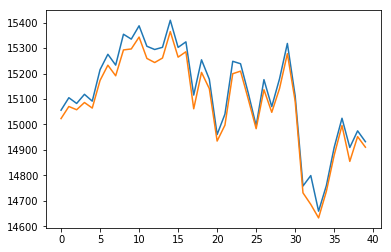

In [0]:
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:] = np.nan
trainPredictPlot[:len(trainPredict)] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict):len(y)]= testPredict
# plot baseline and predictions
plt.plot(scaler_y.inverse_transform(y)[len(trainPredict):len(trainPredict)+40])
#plt.plot(trainPredict,'r')
plt.plot(testPredictPlot[len(trainPredict):len(trainPredict)+40])
plt.show()